In [1]:
%run src/stability_plots
import numpy as np

In [2]:
import numba
numba.__version__

'0.42.0'

In [3]:
%run src/by_monte_carlo_test.py

In [4]:
G = 12  # Grid size

In [5]:
by = BY()

A quick test of the functionality:

In [6]:
f = by_function_factory(by, parallelization_flag=False)


Let's check that the seed is working:

In [7]:
f(n=20, m=20)

0.9986884689424166

In [8]:
f(n=20, m=20)

0.9986884689424166

Remember original values

In [9]:
dot_loc = by.ψ, by.μ_c

In [12]:
psi_vec = np.linspace(1.05, 4.0, G)
mu_vec = np.linspace(0.0005, 0.0045, G)

R = np.empty((G, G))

In [13]:
for i, ψ in enumerate(psi_vec):
    for j, μ_c in enumerate(mu_vec):
        by.ψ = ψ
        by.μ_c = μ_c
        test_function = by_function_factory(by, parallelization_flag=False)
        R[i, j] = test_function()

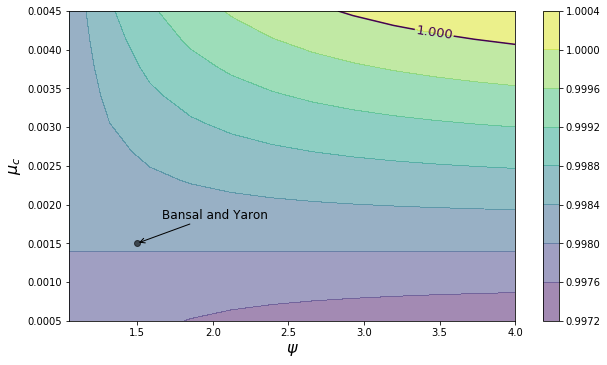

In [14]:
stability_plot(R, 
               psi_vec, mu_vec, 
                "$\psi$", "$\mu_c$", 
                txt_flag='by',
                dot_loc=dot_loc,
                coords=(25, 25))

Now let's look at a different set of parameters:

In [50]:
beta_vec = np.linspace(0.997, 0.99995, G)
psi_vec = np.linspace(1.25, 5.0, G)

In [51]:
by = BY()
dot_loc = by.β, by.ψ

In [52]:
for i, β in enumerate(beta_vec):
    for j, ψ in enumerate(psi_vec):
        by.ψ = ψ
        by.β = β
        test_function = by_function_factory(by, parallelization_flag=False)
        R[i, j] = test_function()

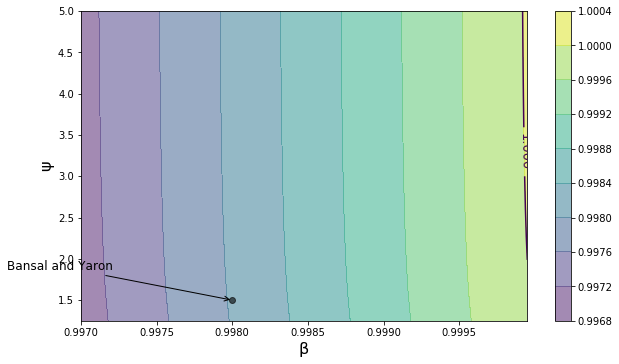

In [53]:
stability_plot(R, 
               beta_vec, psi_vec, 
               "β", "ψ", 
               txt_flag='by',
               dot_loc=dot_loc)